In [ ]:
import numpy as np
from scipy.linalg import null_space
import matplotlib.pylab as plt

$det (A-\lambda I)$

In [ ]:
np.round(np.linalg.inv(autovev)@A@autovev)

array([[-57.+67.j,  -0. -0.j,  -0. -0.j],
       [ -0. +0.j, -57.-67.j,  -0. +0.j],
       [ -0. -0.j,  -0. +0.j,  49. -0.j]])

In [ ]:
import sympy as sp

In [ ]:
λ=sp.Symbol("λ")
A1 = sp.Matrix(A)
I = sp.Matrix(np.identity(3))
M = A1-λ*I

In [ ]:
M

Matrix([
[-1.0*λ - 91,         25,        -85],
[        -36, 13 - 1.0*λ,         23],
[         56,         57, 13 - 1.0*λ]])

In [ ]:
sp.det(M)

-1.0*λ**3 - 65.0*λ**2 - 2152.0*λ + 384122

In [ ]:
P, D = A1.diagonalize()

In [ ]:
P

Matrix([
[(-4*(1 + sqrt(3)*I)**2*(860608 + 1441*(1 + sqrt(3)*I)*(5540482 + 3*sqrt(3412005031635))**(1/3))*(5540482 + 3*sqrt(3412005031635)) + 51437936*(1 + sqrt(3)*I)*(5540482 + 3*sqrt(3412005031635))**(2/3) - 19*(-8924 + (1 + sqrt(3)*I)*(130 + (1 + sqrt(3)*I)*(5540482 + 3*sqrt(3412005031635))**(1/3))*(5540482 + 3*sqrt(3412005031635))**(1/3))**2*(5540482 + 3*sqrt(3412005031635))**(1/3))/(6327984*(1 + sqrt(3)*I)**2*(5540482 + 3*sqrt(3412005031635))), (19*(-8924 + (1 - sqrt(3)*I)*(130 + (1 - sqrt(3)*I)*(5540482 + 3*sqrt(3412005031635))**(1/3))*(5540482 + 3*sqrt(3412005031635))**(1/3))**2*(-1 + sqrt(3)*I)*(5540482 + 3*sqrt(3412005031635))**(1/3) + 4*(-860608 + 1441*(-1 + sqrt(3)*I)*(5540482 + 3*sqrt(3412005031635))**(1/3))*(1 - sqrt(3)*I)**3*(5540482 + 3*sqrt(3412005031635)) + 51437936*(1 - sqrt(3)*I)**2*(5540482 + 3*sqrt(3412005031635))**(2/3))/(6327984*(1 - sqrt(3)*I)**3*(5540482 + 3*sqrt(3412005031635))), -1338*sqrt(3412005031635)*(5540482 + 3*sqrt(3412005031635))**(2/3)/656180432713 -

In [ ]:
D

Matrix([
[-65/3 + (-1/2 - sqrt(3)*I/2)*(5540482/27 + sqrt(3412005031635)/9)**(1/3) - 2231/(9*(-1/2 - sqrt(3)*I/2)*(5540482/27 + sqrt(3412005031635)/9)**(1/3)),                                                                                                                                                    0,                                                                                                          0],
[                                                                                                                                                   0, -65/3 - 2231/(9*(-1/2 + sqrt(3)*I/2)*(5540482/27 + sqrt(3412005031635)/9)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(5540482/27 + sqrt(3412005031635)/9)**(1/3),                                                                                                          0],
[                                                                                                                                                   0,                     




3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br>
a) Diagonalize $A$.<br>




In [ ]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sp
from sympy import symbols, Eq, solve

In [ ]:
x=sp.Symbol('x')
A=sp.Matrix([[2, -1, 1], [0, 3, -1], [2, 1, 3]])
A1=np.matrix([[2, -1, 1], [0, 3, -1], [2, 1, 3]])
I=sp.Matrix(np.identity(3)*x)
I2= np.diag([x,x,x],0)
print(I)
print(I2)

Matrix([[1.0*x, 0, 0], [0, 1.0*x, 0], [0, 0, 1.0*x]])
[[x 0 0]
 [0 x 0]
 [0 0 x]]


##FUNCION PARA CALCULAR LOS VALORES Y VECTORES PROPIOS

In [ ]:

def vapveps(A):
    n = A.shape[0]  # Tamaño de la matriz
    I = np.eye(n)

    # 1. Calcular el polinomio característico det(A - xI) = 0
    coeficientes = np.poly(A)  # Coeficientes del polinomio característico
    valores_propios = np.roots(coeficientes)  # Resolver la ecuación para λ

    # 2. Calcular los vectores propios resolviendo (A - xI)v = 0
    vectores_propios = []

    for lambda_i in valores_propios:
        espacio_nulo = null_space(A - lambda_i * I)  # Resolver el sistema homogéneo
        if espacio_nulo.shape[1] > 0:  # Si hay soluciones
          vectores_propios.append(espacio_nulo[:, 0])  # Tomar el primer vector propio
        else:
          lambda_i =np.round(lambda_i, 6)
          espacio_nulo = null_space(A - lambda_i * I)  # Resolver el sistema homogéneo
          if espacio_nulo.shape[1] > 0:  # Si hay soluciones
            vectores_propios.append(espacio_nulo[:, 0])  # Tomar el primer vector propio

    return valores_propios.T, np.array(vectores_propios).T  # Retornar como columnas

# Definir una matriz cuadrada A
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

# Calcular valores y vectores propios sin usar linalg.eig
valores, vectores = vapveps(A)

#Mostrar resultados
print("Valores propios:")
print(valores)

print("\nVectores propios (columnas):")
print(vectores)


Valores propios:
[4.+0.00000000e+00j 2.+1.40214833e-08j 2.-1.40214833e-08j]

Vectores propios (columnas):
[[ 0.57735027-0.00000000e+00j -0.57735027-0.00000000e+00j
  -0.57735027-0.00000000e+00j]
 [-0.57735027-0.00000000e+00j  0.57735027+8.09530716e-09j
   0.57735027-8.09530716e-09j]
 [ 0.57735027-0.00000000e+00j  0.57735027+4.96308368e-24j
   0.57735027-4.96308368e-24j]]


#DIAGONALIZACION DE A

In [ ]:
A=np.matrix([[2, -1, 1], [0, 3, -1], [2, 1, 3]])
valores_propios, vectores_propios = vapveps(A)#np.linalg.eig(A)

P = vectores_propios
P_inv= np.linalg.inv(P)
D = np.diag(valores_propios)
A2= P@D@P_inv

filas, columnas = np.shape(A2) # Obtener las dimensiones de la matriz
for i in range(filas): # Iterar sobre las filas
  for j in range(columnas): # Iterar sobre las columnas
    A2[i,j]= np.round(A2[i,j], 3)
print('Matriz A teorica (diagonalizacion):\n ',A2)

print('Matriz A real: \n ',A)

Matriz A teorica (diagonalizacion):
  [[ 2.-0.j -1.-0.j  1.-0.j]
 [-0.-0.j  3.-0.j -1.+0.j]
 [ 2.+0.j  1.+0.j  3.-0.j]]
Matriz A real: 
  [[ 2 -1  1]
 [ 0  3 -1]
 [ 2  1  3]]


##GRAFICA DE LA EVOLCUION DE LA POSICION EN FUNCION DEL TIEMPO

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


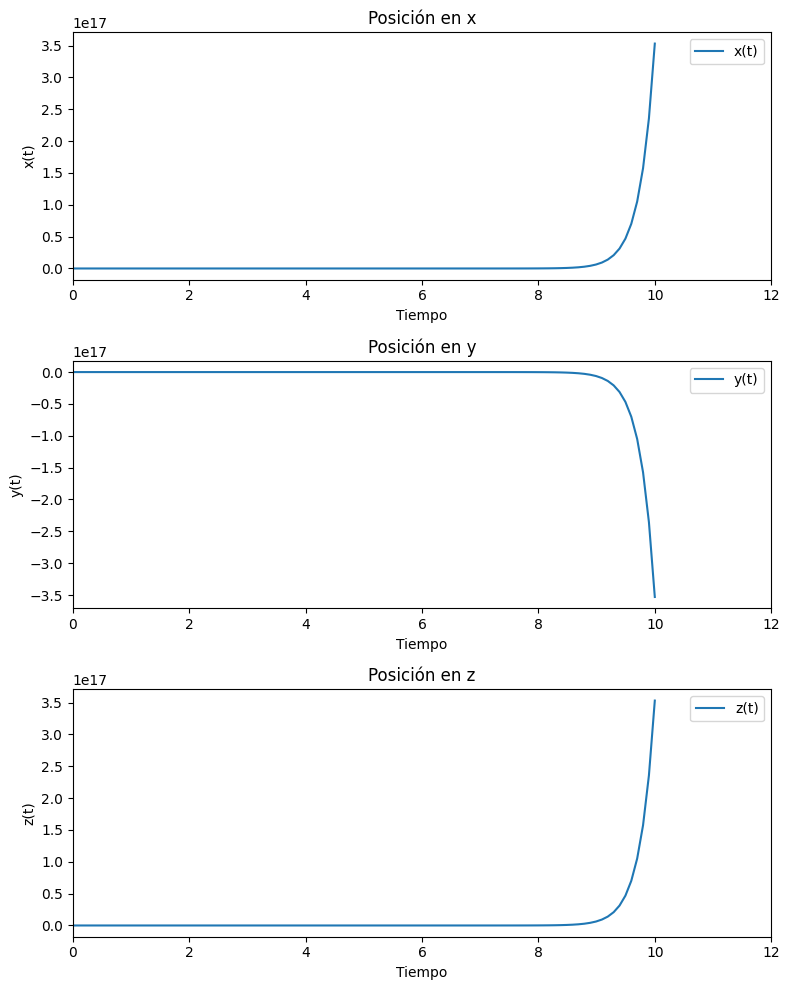

In [ ]:
r0= np.array([1,1,2])
tiempos = np.linspace(0, 10, 100)

A=np.matrix([[2, -1, 1], [0, 3, -1], [2, 1, 3]])
valores_propios, vectores_propios = vapveps(A)#np.linalg.eig(A)
P = vectores_propios
P_inv= np.linalg.inv(P)
posiciones= []

for t in tiempos:

  eDt = np.diag(np.exp(valores_propios * t))
  r_t = P @ eDt @ P_inv @ r0
  # Convertir r_t a un array unidimensional antes de agregarlo a posiciones
  posiciones.append(r_t)#.A1)
posiciones = np.array(posiciones)

fig, axes = plt.subplots(3, 1, figsize=(8, 10))  # 3 rows, 1 column

#==============================================================
limite_inferior = 0  # Define el límite inferior deseado
limite_superior = 12  # Define el límite superior deseado

axes[0].set_xlim([limite_inferior, limite_superior])
axes[1].set_xlim([limite_inferior, limite_superior])
axes[2].set_xlim([limite_inferior, limite_superior])
#==============================================================

# Plot x(t)
axes[0].plot(tiempos, posiciones[:, 0], label='x(t)')
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('x(t)')
axes[0].set_title('Posición en x')
axes[0].legend()

# Plot y(t)
axes[1].plot(tiempos, posiciones[:, 1], label='y(t)')
axes[1].set_xlabel('Tiempo')
axes[1].set_ylabel('y(t)')
axes[1].set_title('Posición en y')
axes[1].legend()

# Plot z(t)
axes[2].plot(tiempos, posiciones[:, 2], label='z(t)')
axes[2].set_xlabel('Tiempo')
axes[2].set_ylabel('z(t)')
axes[2].set_title('Posición en z')
axes[2].legend()

plt.tight_layout()
plt.show()

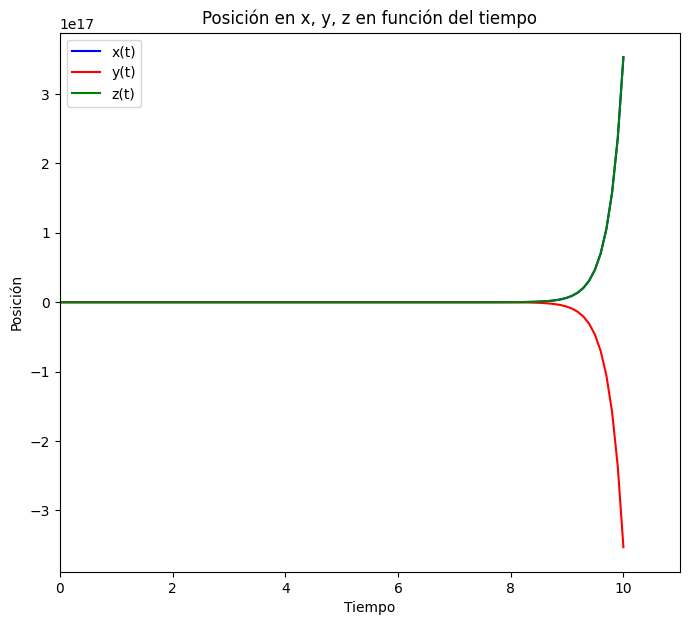

In [ ]:
import numpy as np
import matplotlib.pylab as plt

r0 = np.array([1, 1, 2])
tiempos = np.linspace(0, 10, 100)

A = np.matrix([[2, -1, 1], [0, 3, -1], [2, 1, 3]])
valores_propios, vectores_propios = np.linalg.eig(A)
P = vectores_propios
P_inv = np.linalg.inv(P)
posiciones = []

for t in tiempos:
    eDt = np.diag(np.exp(valores_propios * t))
    r_t = P @ eDt @ P_inv @ r0
    posiciones.append(r_t.A1)

posiciones = np.array(posiciones)
#-----------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,7 ))

ax.plot(tiempos, posiciones[:, 0], label='x(t)', color='blue')
ax.plot(tiempos, posiciones[:, 1], label='y(t)', color='red')
ax.plot(tiempos, posiciones[:, 2], label='z(t)', '-' ,color='green')
ax.set_xlim([0, 11])

ax.legend()
ax.set_xlabel('Tiempo')
ax.set_ylabel('Posición')
ax.set_title('Posición en x, y, z en función del tiempo')

plt.show()